# This is notebook that produces the plots for the tutorial

In [20]:
from data.generate_datasets import make_gravitational_waves
from pathlib import Path
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pipeline import pipeline_embedder
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [21]:
R = 0.65
n_signals = 100
DATA = Path("./data")

noisy_signals, gw_signals, labels = make_gravitational_waves(
    path_to_data=DATA, n_signals=n_signals, r_min=R, r_max=R, n_snr_values=1
)

print(f"Number of noisy signals: {len(noisy_signals)}")
print(f"Number of timesteps per series: {len(noisy_signals[0])}")

Number of noisy signals: 100
Number of timesteps per series: 8692


## Produce plots of the signals
code taken from https://giotto-ai.github.io/gtda-docs/latest/notebooks/gravitational_waves_detection.html#generate-the-data

In [37]:
# get the index corresponding to the first pure noise time series
background_idx = np.argmin(labels)
# get the index corresponding to the first noise + gravitational wave time series
signal_idx = np.argmax(labels)

ts_noise = noisy_signals[background_idx]
ts_background = noisy_signals[signal_idx]
ts_signal = gw_signals[signal_idx]

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_noise))), y=ts_noise, mode="lines", name="noise", showlegend=False ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=list(range(len(ts_background))),
        y=ts_background,
        mode="lines",
        name="background",
        showlegend=False
    ),
    row=1,
    col=2,
)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_signal))), y=ts_signal, mode="lines", name="signal", showlegend=False),
    row=1,
    col=2,
)
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    width=1200, height=400,
    )

fig.show()


## Produce point clounds plots

In [23]:
embedded_clouds = pipeline_embedder.fit_transform(noisy_signals)
embedded_clouds_singal = pipeline_embedder.fit_transform(gw_signals)

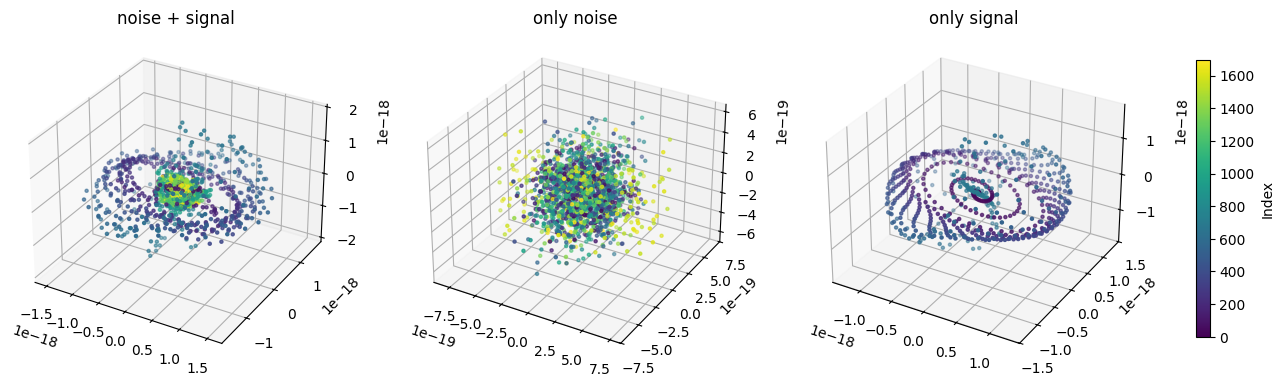

In [24]:
points1 = embedded_clouds[signal_idx]       
points2 = embedded_clouds[background_idx]   
points3 = embedded_clouds_singal[signal_idx]            

indices1 = np.arange(points1.shape[0])
indices2 = np.arange(points2.shape[0])
indices3 = np.arange(points3.shape[0])

fig = plt.figure(figsize=(18, 6))

# Plot 1
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
sc1 = ax1.scatter(points1[:, 0], points1[:, 1], points1[:, 2],
                  c=indices1, cmap='viridis', s=5)
ax1.set_title('noise + signal')

# Plot 2
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
sc2 = ax2.scatter(points2[:, 0], points2[:, 1], points2[:, 2],
                  c=indices2, cmap='viridis', s=5)
ax2.set_title('only noise')

# Plot 3
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
sc3 = ax3.scatter(points3[:, 0], points3[:, 1], points3[:, 2],
                  c=indices3, cmap='viridis', s=5)
cbar = fig.colorbar(sc1, ax=[ax1, ax2, ax3], shrink=0.6, pad=0.04)
cbar.set_label('Index')
ax3.set_title('only signal')

plt.show()